概率论在解决模式识别问题时具有重要作用，它是构成更复杂模型的基石。

概率分布的一个作用是在给定有限次观测x1, . . . , xN的前提下，对随机变量x的概率分布p(x)建模。这个问题被称为密度估计（density estimation）。选择一个合适的分布与模型选择的问题相关，这是模式识别领域的一个中心问题。

## 二元变量

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### 1. 伯努利分布

考虑一个二元随机变量$x\in\{0,1\}$，$x=1$的概率被记作参数$\mu$，因此$p(x=1|\mu)=\mu$，$p(x=0|\mu)=1-\mu$，其中$\mu\leq1$。

x的概率分布可以写成$Bern(x|\mu)=\mu^x(1-\mu)^{1-x}$，称为伯努利分布（$Bernoulli$ $distribution$）。

伯努利分布的均值和方差分别为$\mathbb{E}[x]=\mu$,$var[x]=\mu(1-\mu)$。

假设有x的观测值数据集$\mathbb{D}={x_1,...,x_N}$。假设每次观测都是独立地从$p(x|\mu)$中抽取的，因此关于$\mu$的似然函数是$p(\mathbb{D}|\mu)=\prod\limits_{n=1}^N p(x_n|\mu)=\prod\limits_{n=1}^N \mu^{x_n}(1-\mu)^{1-x_n}$。

其最大似然的估计值是$\mu_{ML}=\frac{1}{N}\sum\limits_{n=1}^N x_n=\frac{m}{N}$，如果把数据集里$x=1$的观测的数量记为m。

**因此，在最大似然的框架中，x=1的概率是数据集中x=1的观测所占的比例。**假设扔一枚硬币5次，碰巧5次硬币都正面朝上，那么$\mu_{ML}=1$。最大似然的结果会预测所有未来的观测值都是正面向上。这是最大似然中过拟合现象的一个极端例子。我们通过引入$\mu$的先验分布，来得到更加合理的解释。

In [2]:
from scipy.stats import bernoulli

**伯努利分布直方图，u=0.6**

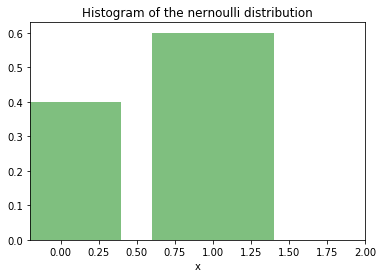

In [3]:
u = 0.6
x = np.arange(2)
bern = bernoulli.pmf(x, u)

plt.bar(x, bern, facecolor='green', alpha=0.5)
plt.xlabel('x')
plt.xlim(-0.2, 2)
plt.title('Histogram of the nernoulli distribution')

plt.show()

### 2. 二项分布

给定数据集规模N的条件下，x = 1的观测出现的数量m的概率分布，称为二项分布（binomial distribution）。

$Bin(m|N, \mu)=\binom{N}{m}\mu^m(1-\mu)^{N-m}$，其中$\binom{N}{m}=\frac{N!}{(N-m)!m!}$。

其均值和方差分别是$\mathbb{E}[m]=\sum\limits_{m=0}^{N}mBin(m|N,\mu)=N\mu$，$var[m]=\sum\limits_{m=0}^{N}(m-\mathbb{E}[x])^2Bin(m|N,\mu)=N\mu(1-\mu)$。

In [4]:
from scipy.stats import binom

In [5]:
N = 10
u = 0.25
m = np.arange(N+1)
binData = binom.pmf(m, N, u)
binData

array([5.63135147e-02, 1.87711716e-01, 2.81567574e-01, 2.50282288e-01,
       1.45998001e-01, 5.83992004e-02, 1.62220001e-02, 3.08990479e-03,
       3.86238098e-04, 2.86102295e-05, 9.53674316e-07])

**关于m的函数的二项分布直方图，其中N=10且u=0.25**

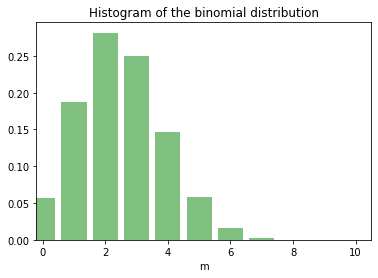

In [6]:
plt.bar(m, binData, facecolor='green', alpha=0.5)
plt.xlabel('m')
plt.xlim(-0.2, 10.5)
plt.title('Histogram of the binomial distribution')

plt.show()

### 3. Beta分布

伯努利分布的似然函数是某个因子与$\mu^x(1-\mu)^{1-x}$的乘积的形式，如果我们选择一个正比于$\mu$和$(1-\mu)$的幂指数的先验概率分布，那么后验概率分布（正比于先验和似然函数的乘积）就会有着与先验分布相同的函数形式。这种性质叫做共轭性（conjugacy）。

Beta分布定义如下：

$$Beta(\mu|a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}$$

$\Gamma(x)$是Gamma函数，保证Beta分布归一化。

Beta分布的均值和方差为$$\mathbb{E}[\mu]=\frac{a}{a+b}，var[\mu]=\frac{ab}{(a+b)^2(a+b+1)}$$

参数a和b被称为超参数（hyperparameter），因为它们控制了参数$\mu$的概率分布。

In [7]:
from scipy.stats import beta

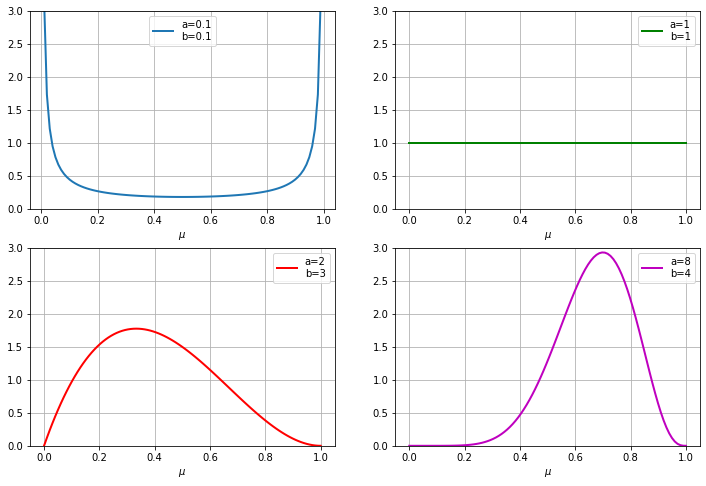

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(221)
x = np.linspace(0, 1, 100)
pbeta = beta.pdf(x, 0.1, 0.1)
ax.plot(x, pbeta, label='a=0.1\nb=0.1',lw=2)
plt.ylim(0,3)
plt.xlabel('$\mu$')
plt.grid(True)
plt.legend(loc="best")

ax = fig.add_subplot(222)
x = np.linspace(0, 1, 100)
pbeta = beta.pdf(x, 1, 1)
ax.plot(x, pbeta, 'g', label='a=1\nb=1',lw=2)
plt.xlabel('$\mu$')
plt.ylim(0,3)
plt.grid(True)
plt.legend(loc="best")

ax = fig.add_subplot(223)
x = np.linspace(0, 1, 100)
pbeta = beta.pdf(x, 2, 3)
ax.plot(x, pbeta, 'r', label='a=2\nb=3',lw=2)
plt.xlabel('$\mu$')
plt.ylim(0,3)
plt.grid(True)
plt.legend(loc="best")

ax = fig.add_subplot(224)
x = np.linspace(0, 1, 100)
pbeta = beta.pdf(x, 8, 4)
ax.plot(x, pbeta, 'm', label='a=8\nb=4',lw=2)
plt.xlabel('$\mu$')
plt.ylim(0,3)
plt.grid(True)
plt.legend(loc="best")

plt.show()

### 4. 后验概率

将Beta先验和二项似然函数相乘，得到后验概率分布的形式为：

$$p(\mu|m,l,a,b)\propto\mu^{m+a-1}(1-\mu)^{l+b-1}$$
其中$l=N-m$对应硬币反面朝上的样本数量。

具体得到归一化系数，公式如下：

$$p(\mu|m,l,a,b)=\frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}$$

我们可以发现，**如果数据集里有m次观测为x=1，有l次观测为x=0，那么从先验概率到后验概率，a的值变大了m，b的值变大了l。**

In [11]:
from scipy.special import comb

pbinom = lambda m, N, p: comb(N, m) * p**m * (1-p)**(N-m)

上面代码是二项式分布的分布函数$Bin(m|N, p)=\binom{N}{m}p^m(1-p)^{N-m}$，其似然函数和该分布函数具有相同的形式，只是其参数p是未知的。

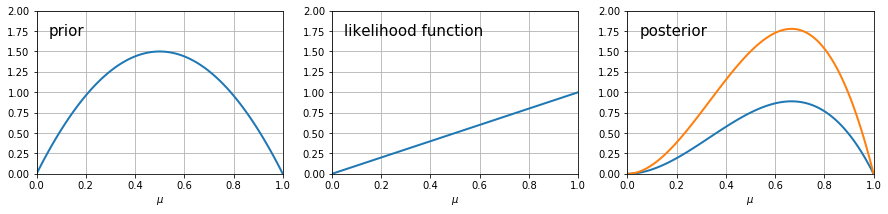

In [12]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(131)
x = np.linspace(0, 1, 100)
pbeta = beta.pdf(x, 2, 2)
ax.plot(x, pbeta,lw=2)
plt.xlim(0,1)
plt.ylim(0,2)
plt.xlabel('$\mu$')
plt.grid(True)
plt.text(0.05, 1.7, "prior", fontsize=15)

ax = fig.add_subplot(132)
x = np.linspace(0, 1, 100)
pbin = pbinom(1, 1, x)
ax.plot(x, pbin,lw=2)
plt.xlim(0,1)
plt.ylim(0,2)
plt.xlabel('$\mu$')
plt.grid(True)
plt.text(0.05, 1.7, "likelihood function", fontsize=15)

ax = fig.add_subplot(133)
x = np.linspace(0, 1, 100)
post = pbeta * x
ax.plot(x, post,lw=2)
ax.plot(x, beta.pdf(x, 3, 2), lw=2)
plt.xlim(0,1)
plt.ylim(0,2)
plt.xlabel('$\mu$')
plt.grid(True)
plt.text(0.05, 1.7, "posterior", fontsize=15)

plt.show()

上面第三幅图中，绿色的线是实际的后验概率的曲线，蓝色曲线是直接将先验概率和似然函数相乘后，没有进行归一化的结果。

图中，beta先验分布的参数是a=2,b=2，似然函数N=m=1，对应获得一个x=1的样本数据，修正的beta后验分布参数是a=3,b=2

## 补充： 贝叶斯推断的三个步骤
- **步骤1：指定概率模型。**，贝叶斯统计学通过使用概率模型来解决问题，所以第一步是要指定具体的概率分布，这一步要做的考虑的问题是，样本的分布模型是什么，什么样的形式可以最好的描述未知参数的不确定性。
- **步骤二：计算后验概率。**后验概率告诉了我们经过样本数据的观测后未知参数是什么样子，其中有多中贝叶斯计算方法来计算后验概率。一旦后验概率计算得到，再得到点估计、区间估计、分位数和预测就相对容易了。
- **步骤三：验证模型。**在将模型进行统计推断之前，我们需要对模型和输出进行评估。我们需要问自己，模型是不是对数据拟合，推论的结果是不是合理，结果是不是对于模型结构的变化很敏感？